In [1]:
# Importing Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
sns.set_style('darkgrid')

In [2]:
# Loading data
data = pd.read_csv('../input/market-segmentationcsv/3.12. Example.csv')
data.head()

,Satisfaction,Loyalty
0,4,-1.33
1,6,-0.28
2,5,-0.99
3,7,-0.29
4,4,1.06


In [3]:
# Checking for Null values
data.isna().sum().to_frame('Null Values')

,Null Values
Satisfaction,0
Loyalty,0


In [4]:
# Structure of Data
data.shape

(30, 2)

In [5]:
# Statistics of data
data.describe()

,Satisfaction,Loyalty
count,30.000000,30.000000
mean,6.400000,0.001000
std,2.620871,1.016476
min,1.000000,-1.690000
25%,4.250000,-0.967500
50%,7.000000,0.150000
75%,8.750000,0.947500
max,10.000000,1.380000


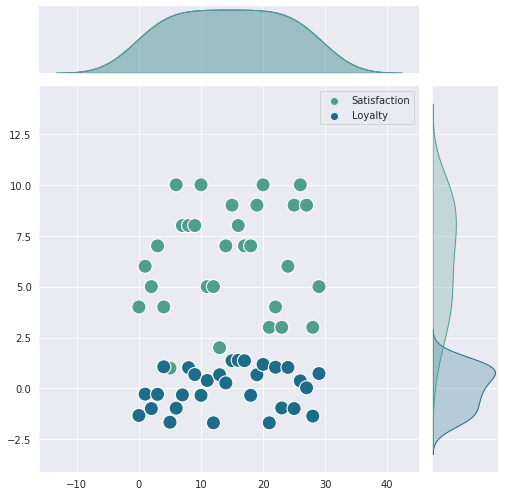

In [6]:
# Plotting distribution of data
sns.jointplot(data=data, s=200, palette='crest', height=7)
plt.show()

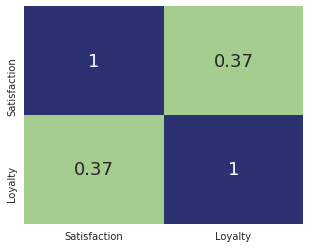

In [7]:
# Plotting correlation between variables
plt.figure(figsize=(5,4))
sns.heatmap(data.corr(), annot=True, cbar=False, cmap='crest', annot_kws={'size':18})
plt.show()

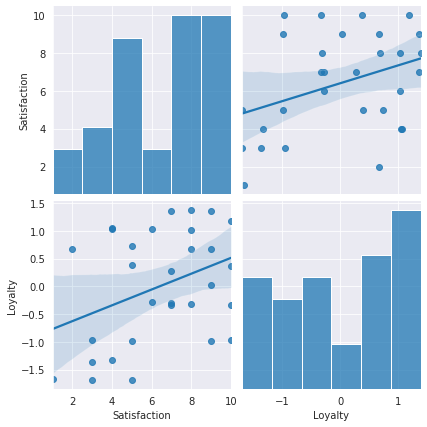

In [8]:
sns.pairplot(data, kind='reg', height=3)
plt.show()

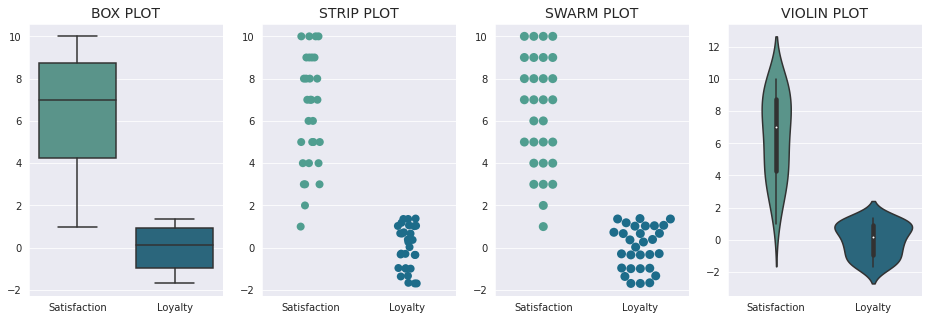

In [9]:
fig, ax = plt.subplots(1, 4, figsize=(16,5))
ax[0].set_title('BOX PLOT', fontsize=14)
ax[1].set_title('STRIP PLOT', fontsize=14)
ax[2].set_title('SWARM PLOT', fontsize=14)
ax[3].set_title('VIOLIN PLOT', fontsize=14)
sns.boxplot(data=data, ax=ax[0], palette='crest')
sns.stripplot(data=data, s=8, ax=ax[1], palette='crest')
sns.swarmplot(data=data, s=9, ax=ax[2], palette='crest')
sns.violinplot(data=data, ax=ax[3], palette='crest')
plt.show()

# K-Means Clustering

In [10]:
# Importing Libraries
from sklearn.cluster import KMeans
from sklearn import metrics

In [11]:
# Preparing data
X = data.values

In [12]:
# Finding optimum number of Clusters
wcss = []
for i in range(1,11):
    km_clust = KMeans(n_clusters=i, init='k-means++', random_state=0)
    km_clust.fit(X)
    wcss.append(km_clust.inertia_)
    print(f'WCSS {i}: {km_clust.inertia_}')

WCSS 1: 229.16347000000002
WCSS 2: 74.54254375
WCSS 3: 50.136244913419915
WCSS 4: 35.524530357142844
WCSS 5: 26.861604166666666
WCSS 6: 21.84828333333333
WCSS 7: 18.464741904761908
WCSS 8: 14.105701666666663
WCSS 9: 11.4797
WCSS 10: 8.771388333333332


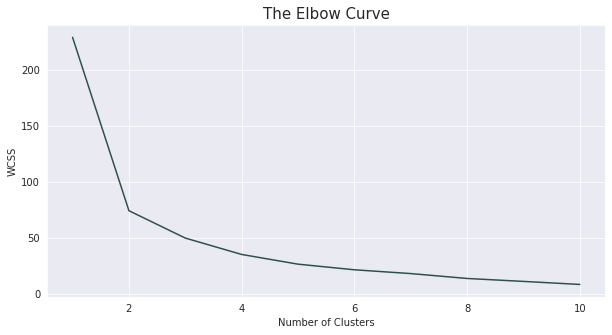

In [13]:
# Plotting Elbow Curve
plt.figure(figsize=(10,5))
plt.plot(range(1,11), wcss, color='#2F4F4F')
plt.title('The Elbow Curve', fontsize=15)
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [14]:
for i in range(2,6):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=0)
    y_means = kmeans.fit_predict(X)
    print(f'Silhouette Score for n={i}: {np.round(metrics.silhouette_score(X, y_means), decimals=3)}')

Silhouette Score for n=2: 0.531
Silhouette Score for n=3: 0.413
Silhouette Score for n=4: 0.365
Silhouette Score for n=5: 0.377


In [15]:
kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0)
y_means = kmeans.fit_predict(X)
y_means

array([0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 0], dtype=int32)

In [16]:
# Cluster Centers
kmeans.cluster_centers_

array([[ 4.      , -0.36    ],
       [ 8.5     ,  0.316875]])

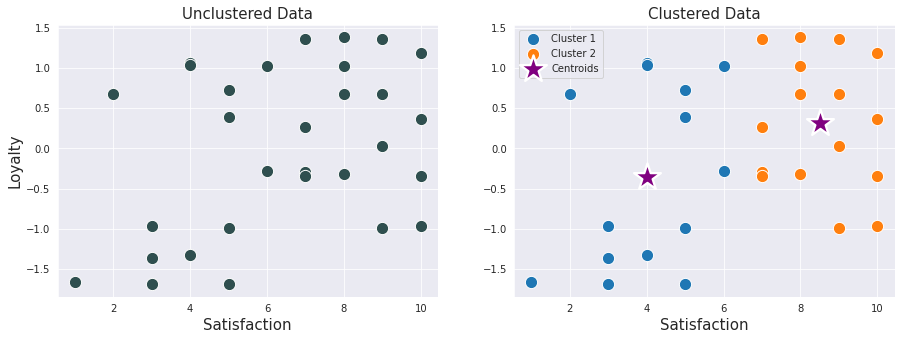

In [17]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[0].set_title('Unclustered Data', fontsize=15)
ax[0].set_xlabel('Satisfaction', fontsize=15)
ax[0].set_ylabel('Loyalty', fontsize=15)
sns.scatterplot(data.iloc[:,0], data.iloc[:,-1], ax=ax[0], s=150, color='#2F4F4F')
ax[1].set_title('Clustered Data', fontsize=15)
ax[1].set_xlabel('Satisfaction', fontsize=15)
for i in range(0,2):
    sns.scatterplot(X[y_means == i, 0], X[y_means == i, 1], s=150, label='Cluster '+str(i+1), ax=ax[1])
sns.scatterplot(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=800, marker='*', 
                color='purple', label='Centroids', ax=ax[1])
fig.show()

## Thank You!